# Baixando as Bibliotecas

In [123]:
# importando as bibliotecas
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from jupyterthemes import jtplot

## Configurando o Estilo do Gráfico

In [168]:
# Configurando o esitlo, escala, as linhas e o tamanho do gráfico
jtplot.style(theme='monokai')
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')
jtplot.style(ticks=True, grid=False, figsize=(8, 8))

# Trabalhando com o datase Diamonds.csv

## Lendo o DataSet 

In [235]:
# Trazendo o DataSet para o Jupyter Notebook
my_precious = pd.read_csv('diamonds.csv',index_col=False)

In [170]:
# Analisando as 5 primeiras linhas do DataSet
my_precious.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


##  Fazendo um DataClean no DataSet e criando novas colunas com valores numéricos

### Criando as novas Colunas 

In [236]:
# Criando as novas colunas modificiando as minhas colunas que são strings em numéricas
my_precious['clarity_'] = my_precious['clarity'].replace(['I1',"SI2","SI1","VS2","VS1","VVS2","VVS1","IF"],[1,2,3,4,5,6,7,8])
my_precious['color_'] = my_precious['color'].replace(['J',"I","H","G","F","E","D"],[1,2,3,4,5,6,7])
my_precious['cut_'] = my_precious['cut'].replace(["Fair", "Good", "Very Good", "Premium", "Ideal"],[1,2,3,4,5])

In [173]:
# Analisando as 5 primeiras linhas com as novas colunas
my_precious.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_,color_,cut_
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,6,4
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5,6,2
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,2,4
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,1,2
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,6,1,3


In [175]:
# Analisando as informações do DataSet
my_precious.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48940 entries, 0 to 48939
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   carat     48940 non-null  float64
 1   cut       48940 non-null  object 
 2   color     48940 non-null  object 
 3   clarity   48940 non-null  object 
 4   depth     48940 non-null  float64
 5   table     48940 non-null  float64
 6   price     48940 non-null  int64  
 7   x         48940 non-null  float64
 8   y         48940 non-null  float64
 9   z         48940 non-null  float64
 10  clarity_  48940 non-null  int64  
 11  color_    48940 non-null  int64  
 12  cut_      48940 non-null  int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 4.9+ MB


In [176]:
# Usando o describe para fazer uma pré análise estatistica
my_precious.describe()

,carat,depth,table,price,x,y,z,clarity_,color_,cut_
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648,4.055456,4.407254,3.906416
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817,1.645542,1.699858,1.116568
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,3.000000,3.000000,3.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000,4.000000,4.000000,4.000000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000,5.000000,6.000000,5.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,8.000000,7.000000,5.000000


###  Realzinado a Limpeza da Tabela 

In [177]:
# Analisando se existe valores nulos no Dataset
my_precious.loc[(my_precious["x"]==0) | (my_precious["y"]==0) | (my_precious["z"]==0), :]

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_,color_,cut_
2010,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0,2,4,4
2104,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0,1,3,4
4323,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0,2,4,4
4941,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0,2,5,4
9187,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0,1,4,2
10119,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0,2,5,5
10825,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0,4,3,3
12290,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0,4,4,5
14433,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0,5,4,1
22126,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0,2,3,4


In [237]:
# Apagando as linhas que não possuem valores para os eixos x, y e z
my_precious.drop(my_precious.loc[(my_precious['x'] ==0) | (my_precious['y'] == 0), :].index, inplace =True)

In [178]:
# Criando uma função para calcular o valor do eixo z
def calculate_z(row):
    x = row['x']
    y = row['y']
    depth = row['depth']
    z=(depth/100)*(x+y)/2
    return z

In [238]:
# Aplicando a minha função no DataSet
my_precious.loc[my_precious['z']== 0, 'z'] = my_precious.loc[my_precious['z']== 0, :].apply(calculate_z, axis =1)

In [239]:
# Analisando novamente se fez as substituições e o drop das linhas  
my_precious.loc[(my_precious["x"]==0) | (my_precious["y"]==0) | (my_precious["z"]==0), :]

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_,color_,cut_


In [183]:
# Analisando se sobrou algum z com valor nulo
my_precious.loc[my_precious['z']== 0, :]

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_,color_,cut_


###  Salvando o DataSet Limpo

In [184]:
# Salvando o DataSet com todas as limpezas e Modificações
my_precious.to_csv('./my_precious_clean.csv')

## Análisando as correlações através de gráficos 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

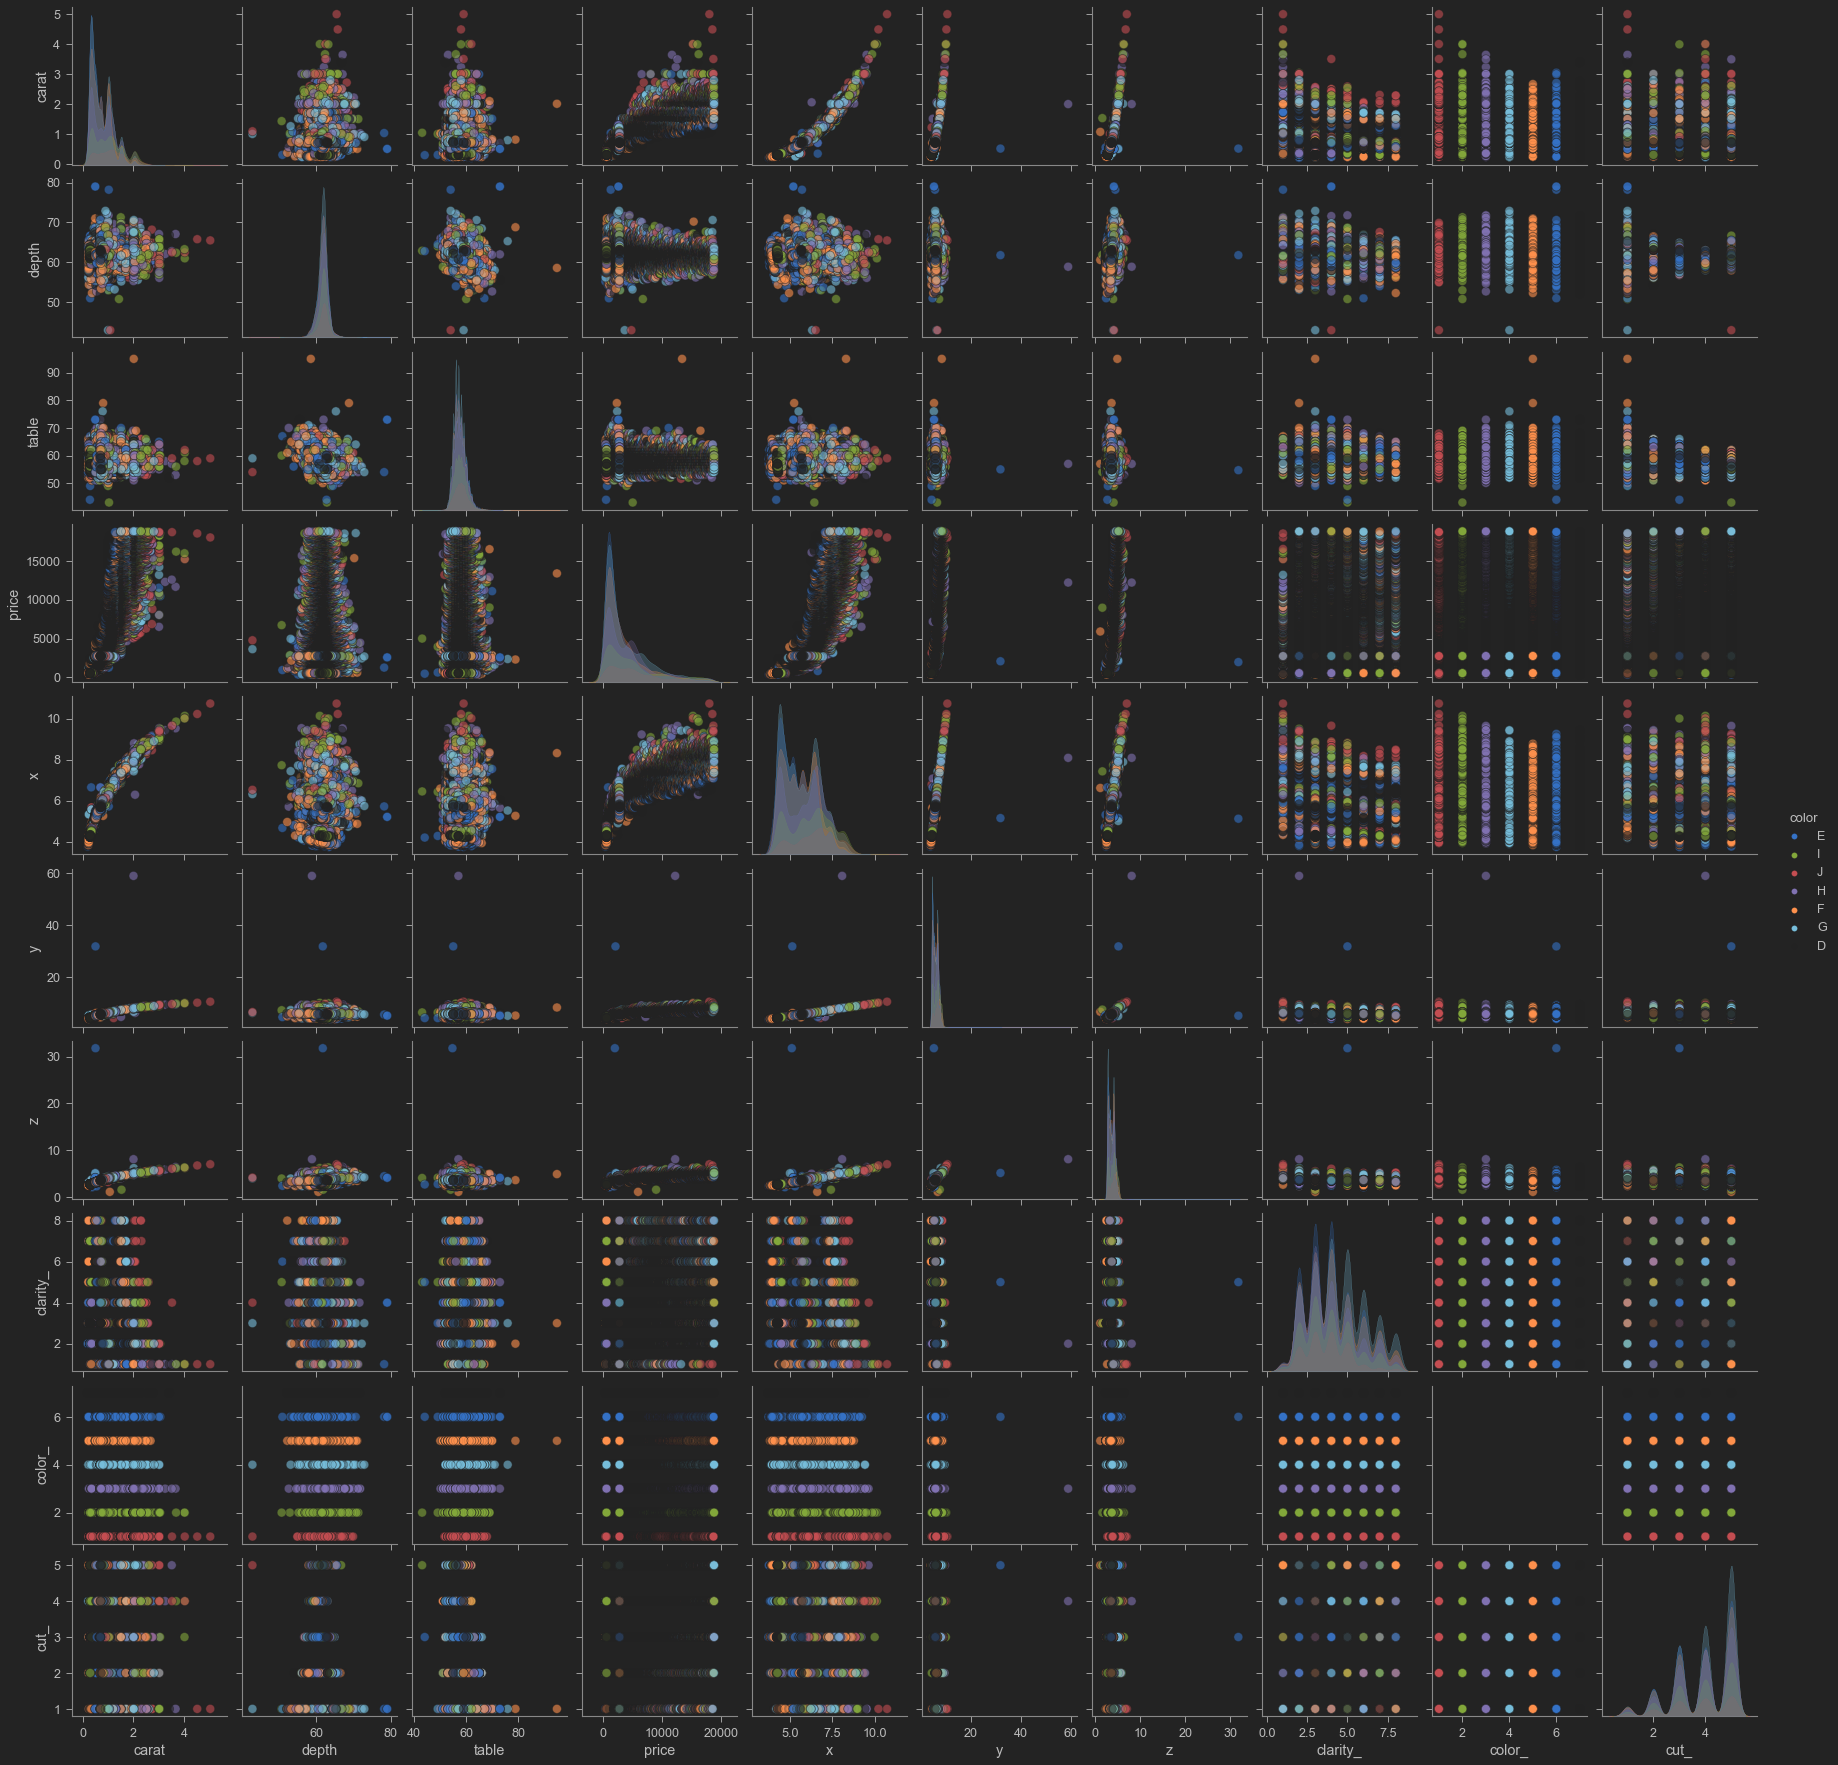

In [222]:
# Plotando o gráfico de pairplot
sns.color_palette("Set3", 10)
sns.pairplot(my_precious, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, hue='color');

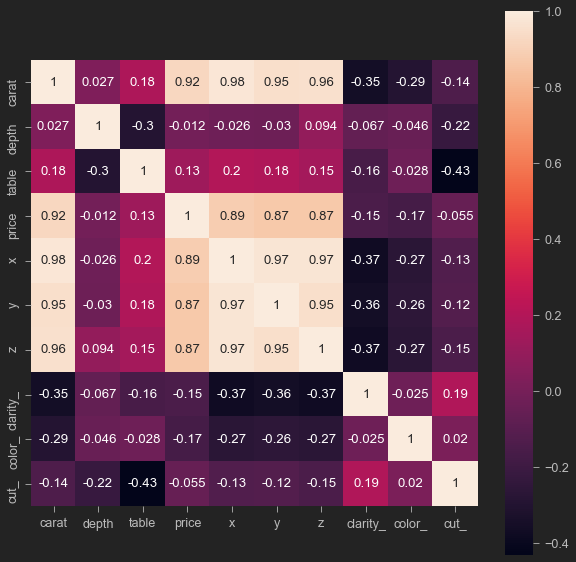

In [185]:
# Plotando o gráfico Map de correlação entre a colunas carat x price
plt.figure(figsize=(10, 10))
sns.heatmap(my_precious.corr(), annot=True, square=True);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


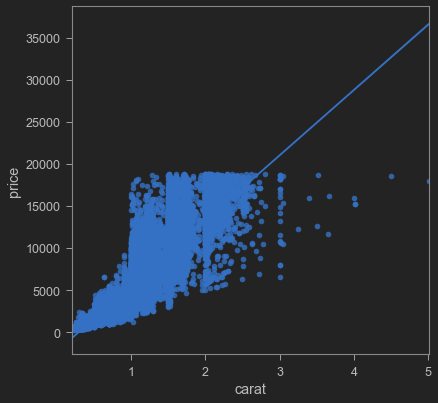

In [186]:
# Plotando o gráfico regplot entre o carat x price
sns.regplot(my_precious.carat, my_precious.price, scatter=True);

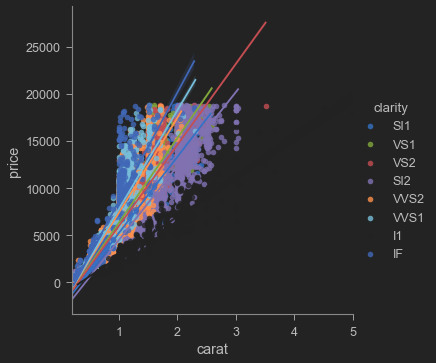

In [187]:
# Plotando o gráfico lmplot com hue no clarity
sns.lmplot(x = 'carat', y= 'price', hue= 'clarity', data=my_precious);

## Transfomando as colunas price e carat em logaritmo

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


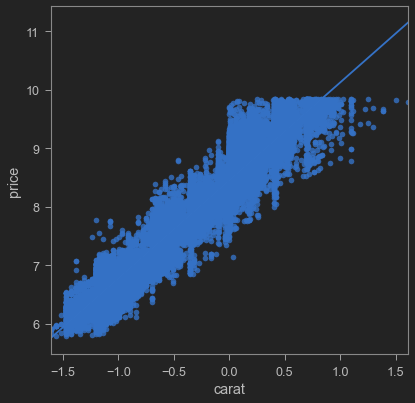

In [188]:
# Plotando o gráfico regplot pelo log do carat x log do price
sns.regplot(np.log(my_precious.carat), np.log(my_precious.price), scatter=True);

## Treinando o modelo

### Modelo com duas variáveis

In [240]:
# Criando o modelo de Regressão Linear Simples
model = LinearRegression()

X = np.log(my_precious[['carat']])
y = np.log(my_precious['price'])

model.fit(X, y)

LinearRegression()

In [191]:
# Análise do coeficente do modelo
model.coef_

array([1.67569388])

In [190]:
# Análise do Intercept do modelo
model.intercept_

8.449443277694538

In [192]:
# Análise do Predict do modelo
df_predict = model.predict(X)
df_predict

array([5.8342754 , 5.98671625, 6.3751448 , ..., 7.89897102, 7.85176526,
       7.96737619])

In [193]:
# Análise do Score do modelo
model.score(X,y)

0.9332727527540378

In [194]:
# Análise do R² do modelo
np.sqrt(mean_squared_error(y, df_predict))

0.2620774503917054

### Modelo  com sete variáveis

In [241]:
# Criando o modelo de Regressão Linear Múltiplas
model1 = LinearRegression()

df = np.log(my_precious[['carat', 'clarity_', 'cut_', 'color_','depth','table']])

X1 = df

model1.fit(X1, y)

LinearRegression()

In [196]:
# Análise do coeficente do modelo
model1.coef_

array([ 1.88278207,  0.47967929,  0.09312197,  0.27673677, -0.09939193,
       -0.02596299])

In [197]:
# Análise do Intercept do modelo
model1.intercept_

7.911335102489944

In [242]:
# Análise do Predict do modelo
df1_predict = model1.predict(X1)
df1_predict

array([5.61155373, 5.96661081, 6.05031365, ..., 7.90687307, 7.88980575,
       7.87599341])

In [199]:
# Análise do Score do modelo
model1.score(X1,y)

0.9821117537388616

In [200]:
# Análise do R² do modelo
np.sqrt(mean_squared_error(y, df1_predict))

0.1356944025314551

# Trabalhando o dataset rick_diamonds

## Lendo o dataset

In [243]:
# Trazendo o segundo DataSet para o Jupyter Notebook
rick_precious = pd.read_csv('rick_diamonds.csv',index_col=False)

In [228]:
# Analisando as 5 primeiras linhas do DataSet
rick_precious.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18


In [229]:
# Usando o describe para fazer uma pré análise estatistica
rick_precious.describe()

,carat,depth,table,x,y,z
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.799144,61.724680,57.516140,5.735516,5.736410,3.539576
std,0.472936,1.457691,2.244019,1.120300,1.110345,0.694733
min,0.200000,44.000000,50.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.720000,4.720000,2.910000
50%,0.710000,61.800000,57.000000,5.710000,5.720000,3.530000
75%,1.040000,62.500000,59.000000,6.530000,6.520000,4.032500
max,4.130000,73.600000,70.000000,10.000000,9.850000,6.430000


In [230]:
# Analisando as informações do DataSet
rick_precious.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    5000 non-null   float64
 1   cut      5000 non-null   object 
 2   color    5000 non-null   object 
 3   clarity  5000 non-null   object 
 4   depth    5000 non-null   float64
 5   table    5000 non-null   float64
 6   x        5000 non-null   float64
 7   y        5000 non-null   float64
 8   z        5000 non-null   float64
dtypes: float64(6), object(3)
memory usage: 351.7+ KB


## Criando as colunas com as varáveis numéricas

In [244]:
# Criando as novas colunas modificiando as minhas colunas que são strings em numéricas
rick_precious['clarity_'] = rick_precious['clarity'].replace(['I1',"SI2","SI1","VS2","VS1","VVS2","VVS1","IF"],[1,2,3,4,5,6,7,8])
rick_precious['cut_'] = rick_precious['cut'].replace(["Fair", "Good", "Very Good", "Premium", "Ideal"],[1,2,3,4,5])
rick_precious['color_'] = rick_precious['color'].replace(['J',"I","H","G","F","E","D"],[1,2,3,4,5,6,7])

## Aplicando o modelo treinado para obter a coluna price_predicted

In [245]:
# Utilizando o modelo de Regressão Linear Multiplas 
rick_precious['price_predicted'] = model1.predict(np.log(rick_precious[['carat', 'clarity_', 'cut_', 'color_','depth', 'table']]))

In [246]:
# Transformando os valores da coluna price_predicted de logaritmo para normal 
rick_precious['price_predicted'] = np.exp(rick_precious['price_predicted'])

## Fazendo o download rick_precious com as novas variáveis

In [247]:
# Salvando o DataSet com todas as limpezas e Modificações
rick_precious.to_csv('./rick_precious.csv')

## Testando o modelo da nova coluna

In [209]:
# Criando um modelo para análise
model2 = LinearRegression()

df = np.log(rick_precious[['carat', 'clarity_', 'cut_', 'color_','depth','table']])
X2 = df
y2 = np.log(rick_precious['price_predicted'])

model2.fit(X2, y2)

LinearRegression()

In [210]:
# Analisando o Score 
model2.score(X2,y2)

1.0

In [211]:
# # Usando o describe para fazer uma pré análise estatistica
rick_precious.describe()

,carat,depth,table,x,y,z,clarity_,cut_,color_,price_predicted
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,0.799144,61.724680,57.516140,5.735516,5.736410,3.539576,4.007600,3.881400,4.39160,3873.235238
std,0.472936,1.457691,2.244019,1.120300,1.110345,0.694733,1.662196,1.116774,1.71337,3931.945679
min,0.200000,44.000000,50.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,271.388103
25%,0.400000,61.000000,56.000000,4.720000,4.720000,2.910000,3.000000,3.000000,3.00000,967.203727
50%,0.710000,61.800000,57.000000,5.710000,5.720000,3.530000,4.000000,4.000000,4.00000,2470.191647
75%,1.040000,62.500000,59.000000,6.530000,6.520000,4.032500,5.000000,5.000000,6.00000,5230.703710
max,4.130000,73.600000,70.000000,10.000000,9.850000,6.430000,8.000000,5.000000,7.00000,31708.627728


## Análisando as correlações através do gráfico map 

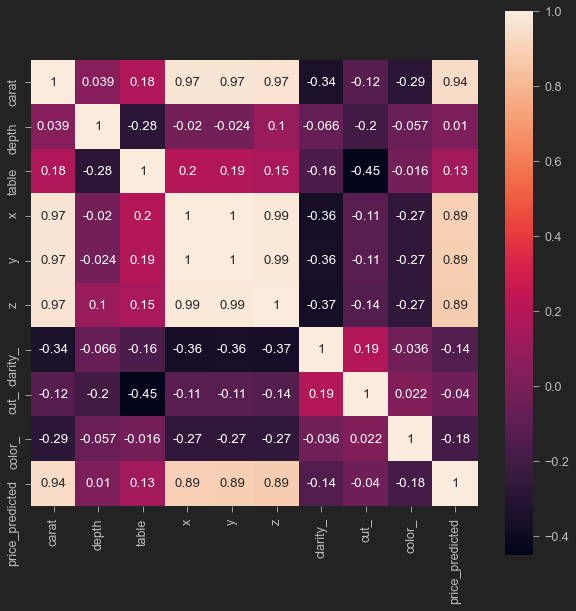

In [212]:
# Plotando o gráfico Map de correlação entre a colunas carat x price_predict
plt.figure(figsize=(10, 10))
sns.heatmap(rick_precious.corr(), annot=True, square=True);